<a href="https://colab.research.google.com/github/dele22922/tarea3_feat_eng/blob/main/tarea_mixta_vdeleon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **VDELEON 22922 TIGO**

# **CURSO BUSINESS ANALYTICS MODELS**

# **ANTONIO MEDRANO UVG**


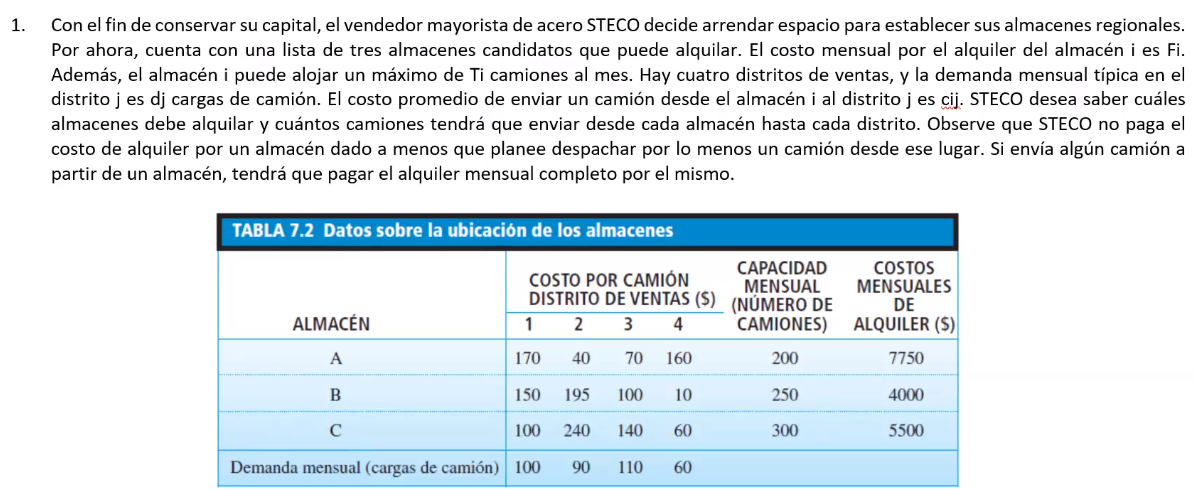

In [ ]:
!pip install pulp
import numpy as np
from pulp import *

In [ ]:
## Datos

alquilermensual = np.array([7750,4000,5500])
capacidadMensual = np.array([200,250,300])
costoXcamionD1=np.array([170,150,100])
costoXcamionD2=np.array([40,195,240])
costoXcamionD3=np.array([70,100,140])
costoXcamionD4=np.array([160,10,60])
#costocamion=np.array([[170,150,100],
#                      [40,195,240],
#                      [70,100,140],
#                      [160,10,60]])
DemandaMensual = np.array([100,90,110,60])
numAlmacen=len(alquilermensual)
numDistrito=len(DemandaMensual)

In [ ]:
numAlmacen

3

In [ ]:
## Problema
costo = LpProblem("costo", LpMinimize)

In [ ]:
## Variables de Decision
#numcamionesD1 =  LpVariable.matrix("Distrito_1_", ['A','B','C'],lowBound=0,cat="Continuous")
#numcamionesD2 =  LpVariable.matrix("Distrito_2_", ['A','B','C'],lowBound=0,cat="Continuous")
#numcamionesD3 =  LpVariable.matrix("Distrito_3_", ['A','B','C'],lowBound=0,cat="Continuous")
#numcamionesD4 =  LpVariable.matrix("Distrito", ['A','B','C'],lowBound=0,cat="Continuous")
costocamionBodega = LpVariable.matrix("CostoCamionBodega",(range(numDistrito),range(numAlmacen)), lowBound=0,cat="Continuous")
costoalquiler = LpVariable.matrix("Costoalquiler",range(len(alquilermensual)), lowBound=0,cat="Continuous")
usarAlmacen = LpVariable.matrix("Almacen_", range(len(alquilermensual)),lowBound=0 , cat="Binary")

costocamionD1xB =  LpVariable.matrix("Distrito_1", range(len(alquilermensual)),lowBound=0,cat="Continuous")
costocamionD2xB =  LpVariable.matrix("Distrito_2", range(len(alquilermensual)),lowBound=0,cat="Continuous")
costocamionD3xB =  LpVariable.matrix("Distrito_3", range(len(alquilermensual)),lowBound=0,cat="Continuous")
costocamionD4xB =  LpVariable.matrix("Distrito_4", range(len(alquilermensual)),lowBound=0,cat="Continuous")


In [ ]:
costocamionD1xB

[Distrito_1_0, Distrito_1_1, Distrito_1_2]

In [ ]:
## Funcion objetivo
#CostoTelefonia = CostosFijos + CargosMinFijo + CargosMinCel


#CostoMinFijo =  lpSum([minfija[i]*CargosMinFijo[i] for i in range(numprov)])
#CostoMinCel = lpSum([mincelular[i]*CargosMinCel[i] for i in range(numprov)])
#CostoFijoTot = lpSum([CostosFijos[i]*usarprov[i] for i in range(numprov)])

CostoTransporteD1 = lpSum([costocamionD1xB[i]*costoXcamionD1[i] for i in range(numAlmacen)])
CostoTransporteD2 = lpSum([costocamionD2xB[i]*costoXcamionD2[i] for i in range(numAlmacen)])
CostoTransporteD3 = lpSum([costocamionD3xB[i]*costoXcamionD3[i] for i in range(numAlmacen)])
CostoTransporteD4 = lpSum([costocamionD4xB[i]*costoXcamionD4[i] for i in range(numAlmacen)])


CostoAlquilerTot = lpSum([costoalquiler[i]*alquilermensual[i] for i in range(len(alquilermensual))])

costo += CostoTransporteD1 + CostoTransporteD2 + CostoTransporteD3 + CostoTransporteD4 + CostoAlquilerTot

In [ ]:
costo

costo:
MINIMIZE
7750*Costoalquiler_0 + 4000*Costoalquiler_1 + 5500*Costoalquiler_2 + 170*Distrito_1_0 + 150*Distrito_1_1 + 100*Distrito_1_2 + 40*Distrito_2_0 + 195*Distrito_2_1 + 240*Distrito_2_2 + 70*Distrito_3_0 + 100*Distrito_3_1 + 140*Distrito_3_2 + 160*Distrito_4_0 + 10*Distrito_4_1 + 60*Distrito_4_2 + 0
VARIABLES
Costoalquiler_0 Continuous
Costoalquiler_1 Continuous
Costoalquiler_2 Continuous
Distrito_1_0 Continuous
Distrito_1_1 Continuous
Distrito_1_2 Continuous
Distrito_2_0 Continuous
Distrito_2_1 Continuous
Distrito_2_2 Continuous
Distrito_3_0 Continuous
Distrito_3_1 Continuous
Distrito_3_2 Continuous
Distrito_4_0 Continuous
Distrito_4_1 Continuous
Distrito_4_2 Continuous

In [ ]:
costocamionBodega

[[CostoCamionBodega_0_0, CostoCamionBodega_0_1, CostoCamionBodega_0_2],
 [CostoCamionBodega_1_0, CostoCamionBodega_1_1, CostoCamionBodega_1_2],
 [CostoCamionBodega_2_0, CostoCamionBodega_2_1, CostoCamionBodega_2_2],
 [CostoCamionBodega_3_0, CostoCamionBodega_3_1, CostoCamionBodega_3_2]]

In [ ]:
## Restricciones


##costo +=  lpSum([DemandaMensual[i] for i in range(numDistrito)]) <= 750

#lpSum(capacidadMensual[j] for j in range(numAlmacen)*usarAlmacen)

#for j in range(numDistrito):
#    costo +=  DemandaMensual[j] <= (reqRedFija + reqCelular) * usarprov[j]

#Telefonia += lpSum([usarprov[i] for i in range(numprov)]) >= 2



#costo +=  lpSum([costocamionBodega[i]*costocamion[i] for i in range(len(costocamion))]) <= DemandaMensual[i]


#for j in range(numDistrito):
costo +=  lpSum([DemandaMensual[j] for j in range(numDistrito)]) <= lpSum(capacidadMensual)  * usarAlmacen


In [ ]:
costo

costo:
MINIMIZE
7750*Costoalquiler_0 + 4000*Costoalquiler_1 + 5500*Costoalquiler_2 + 170*Distrito_1_0 + 150*Distrito_1_1 + 100*Distrito_1_2 + 40*Distrito_2_0 + 195*Distrito_2_1 + 240*Distrito_2_2 + 70*Distrito_3_0 + 100*Distrito_3_1 + 140*Distrito_3_2 + 160*Distrito_4_0 + 10*Distrito_4_1 + 60*Distrito_4_2 + 0
SUBJECT TO
_C1:0 >= -10

_C2:0 <= 390

VARIABLES
Costoalquiler_0 Continuous
Costoalquiler_1 Continuous
Costoalquiler_2 Continuous
Distrito_1_0 Continuous
Distrito_1_1 Continuous
Distrito_1_2 Continuous
Distrito_2_0 Continuous
Distrito_2_1 Continuous
Distrito_2_2 Continuous
Distrito_3_0 Continuous
Distrito_3_1 Continuous
Distrito_3_2 Continuous
Distrito_4_0 Continuous
Distrito_4_1 Continuous
Distrito_4_2 Continuous

In [ ]:
costo.solve()

1

In [ ]:
costo.objective.value()

0.0

In [ ]:
for var in costo.variables():
    print(var.name, var.value())

Costoalquiler_0 0.0
Costoalquiler_1 0.0
Costoalquiler_2 0.0
Distrito_1_0 0.0
Distrito_1_1 0.0
Distrito_1_2 0.0
Distrito_2_0 0.0
Distrito_2_1 0.0
Distrito_2_2 0.0
Distrito_3_0 0.0
Distrito_3_1 0.0
Distrito_3_2 0.0
Distrito_4_0 0.0
Distrito_4_1 0.0
Distrito_4_2 0.0


Programacion Lineal Entera Mixta
Usted ha sido designado por el gerente de su empresa para decidir cómo distribuirá su tráfico telefónico en el próximo mes, seleccionando entre 3 proveedores posibles y asignando la cantidad de tráfico (minutos) que desee en cada caso, es decir, puede repartir el tráfico en 1, 2 o 3 proveedores y su decisión sólo dependerá de los costos de cada alternativa.

El proveedor 1 cobra un cargo fijo mensual de 150 y el costo por minuto a red fija es de 0.02 y a celular de 0.12. El proveedor 2 tiene un cargo fijo mensual de 160, con un costo por minuto de 0.015 y 0.15 a red fija y celular respectivamente. Finalmente el proveedor 3 tiene un cargo fijo mensual de solamente 50 con un costo por minuto a red fija de 0.03 y a celular de 0.14. Si usted llama por uno de estos proveedores (aunque hable sólo un minuto) deberá pagar el cargo fijo. Asuma que la cantidad de minutos que la empresa consume mensualmente es de 30,000 para red fija y 18,000 para celular. Formule y resuelva un modelo de Programación que permita decidir cómo distribuir el tráfico telefónico mensual de la forma más económica para la empresa.

# **Librerias Python**

In [ ]:
!pip install pulp
import numpy as np
from pulp import *

# **Datos**

In [ ]:
reqRedFija = 30000
reqCelular = 18000
CostosFijos = np.array([150,160,50])
CargosMinFijo = np.array([0.03,0.015,0.03])
CargosMinCel = np.array([0.12,0.15,0.14])
numprov = len(CostosFijos)

# **Problema**

In [ ]:
Telefonia = LpProblem("Telefonia",LpMinimize)

# **Variables de decision**

In [ ]:
mincelular =  LpVariable.matrix("Cel", range(numprov),lowBound=0,cat="Continuous")
minfija = LpVariable.matrix("Fija", range(numprov), lowBound=0, cat="Continuous")
usarprov = LpVariable.matrix("Prov", range(numprov), cat="Binary")

In [ ]:
usarprov

[Prov_0, Prov_1, Prov_2]

# **Funcion Objetivo**

In [ ]:
CostoTelefonia = CostosFijos + CargosMinFijo + CargosMinCel


CostoMinFijo =  lpSum([minfija[i]*CargosMinFijo[i] for i in range(numprov)])
CostoMinCel = lpSum([mincelular[i]*CargosMinCel[i] for i in range(numprov)])
CostoFijoTot = lpSum([CostosFijos[i]*usarprov[i] for i in range(numprov)])

Telefonia += CostoMinFijo + CostoMinCel + CostoFijoTot

In [ ]:
Telefonia

Telefonia:
MINIMIZE
0.12*Cel_0 + 0.15*Cel_1 + 0.14*Cel_2 + 0.03*Fija_0 + 0.015*Fija_1 + 0.03*Fija_2 + 150*Prov_0 + 160*Prov_1 + 50*Prov_2 + 0.0
VARIABLES
Cel_0 Continuous
Cel_1 Continuous
Cel_2 Continuous
Fija_0 Continuous
Fija_1 Continuous
Fija_2 Continuous
0 <= Prov_0 <= 1 Integer
0 <= Prov_1 <= 1 Integer
0 <= Prov_2 <= 1 Integer

# **Restricciones**

In [ ]:

Telefonia +=  lpSum([mincelular[i] for i in range(numprov)]) >= reqCelular
Telefonia +=  lpSum([minfija[i] for i in range(numprov)]) >= reqRedFija

for j in range(numprov):
    Telefonia +=  mincelular[j] + minfija[j] <= (reqRedFija + reqCelular) * usarprov[j]

Telefonia += lpSum([usarprov[i] for i in range(numprov)]) >= 2

In [ ]:
Telefonia

Telefonia:
MINIMIZE
0.12*Cel_0 + 0.15*Cel_1 + 0.14*Cel_2 + 0.03*Fija_0 + 0.015*Fija_1 + 0.03*Fija_2 + 150*Prov_0 + 160*Prov_1 + 50*Prov_2 + 0.0
SUBJECT TO
_C1: Cel_0 + Cel_1 + Cel_2 >= 18000

_C2: Fija_0 + Fija_1 + Fija_2 >= 30000

_C3: Cel_0 + Fija_0 - 48000 Prov_0 <= 0

_C4: Cel_1 + Fija_1 - 48000 Prov_1 <= 0

_C5: Cel_2 + Fija_2 - 48000 Prov_2 <= 0

_C6: Prov_0 + Prov_1 + Prov_2 >= 2

VARIABLES
Cel_0 Continuous
Cel_1 Continuous
Cel_2 Continuous
Fija_0 Continuous
Fija_1 Continuous
Fija_2 Continuous
0 <= Prov_0 <= 1 Integer
0 <= Prov_1 <= 1 Integer
0 <= Prov_2 <= 1 Integer

In [ ]:
Telefonia.solve()

1

In [ ]:
Telefonia.objective.value()

2920.0

In [ ]:
for var in Telefonia.variables():
    print(var.name, var.value())

Cel_0 18000.0
Cel_1 0.0
Cel_2 0.0
Fija_0 0.0
Fija_1 30000.0
Fija_2 0.0
Prov_0 1.0
Prov_1 1.0
Prov_2 0.0
